## **Save** the notebook to your own Google Drive  

## Welcome back

Dear Oceanography Students,

Welcome back to our virtual ship classroom! We hope you had a restful Christmas break after our simulated cruise. Now, it's time to dive into the next phase of our research journey.

`Please continue your work (with your partner) and write down your name(s) and studentnumber(s) here...`

If you didn't manage to create your own cruise results, please download a results file from Blackboard and upload it into Colab (It would be nice if not all groups choose the same!). Otherwise make sure you upload your own results :-)

In [ ]:
# Run this cell to unpack the results folder
!unzip results.zip -d .

*If you are using Safari and the results folder is unpacked straight away. Click Preferences. Under the General tab, uncheck the option Open “safe” files after downloading.*

$\color{green}{\text{# The following cells only need to be run if you uploaded your own data! If you use results from Blackboard the data has already been postprocessed.}}$

The data you've gathered still requires some postprocessing before you can continue your work to extract meaningful insights.

So make sure you install the required packages and download the necessary scripts by running the cells below. You can continue reading while the cells are being executed.

In [ ]:
# ONLY run if you saved your own results from Dec 18th!
!pip install parcels
!pip install cartopy
!pip install xarray
!pip install cftime
!pip install cgen
!pip install netCDF4
!pip install zarr

In [ ]:
# ONLY run if you saved your own results from Dec 18th!
# Download data
import requests

files = {
    "virtualship.py":"https://raw.githubusercontent.com/OceanParcels/Virtual_ship_classroom/main/virtualship.py"}

for filename, url in files.items():
  response = requests.get(url, allow_redirects=True)

  if response.status_code == 200:
      with open(filename, "wb") as f:
          f.write(response.content)
  else:
      print("Failed to download", url)
print('Download ready')

Please check your Results folder for the number of CTD stations you have visited during the cruise and specify as ctd_num below:

In [ ]:
# ONLY run if you saved your own results from Dec 18th!
ctd_num = <remove this and fill in>

# Run the following lines to postprocess the data from the virtual ship
from virtualship import VirtualShip
VirtualShip.postprocess(ctd=ctd_num)

### CTD procedure

While that's being handled, please revisit the CTD operation procedure below and the CTD manual that can be found on Blackboard.

1. Check the CTD System: Before deployment, ensure that the CTD system is in working order.

2. Communicate with Winch Operator: Before, during and after deployment, maintain continuous communication with the winch operator. Relay any instructions for changes in speed, depth, or other parameters.	Warn the winch operator when CTD is coming near the bottom (100m, 50m, 20m), when to stop and hoist it back up.

3. Depth Profiling: While the CTD is submerged, keep an eye on the data being collected at various depths as the instrument descends and ascends. Follow the predetermined sampling plan or adjust as needed based on real-time observations.

Since the ocean is about 4 km deep in the El Nino region you would have been doing this for 2 hours straigth for every cast. Requiring quite a bit of patience and focus.

![CTD operation](https://www.nioz.nl/application/files/8716/7933/4421/2023-03-26-CTD2.jpg)



## Thermocline

If you managed to make it to the end of the practical/notebook on  December 18th (perhaps in a separate notebook) you can revisit your work and find your code to plot a CTD profile. Otherwise you can start from the code below. You will use the CTD profile to locate the thermocline.

The thermocline is typically characterized by a sharp decrease in temperature compared to the layers above and below it. Look at your temperature vs. depth plot and compare the temperature characteristics of the potential thermocline to the layers above and below. The thermocline should stand out as a distinct transition layer where the temperature gradient is steeper. In addition to temperature, consider other parameters such as salinity. The thermocline is often associated with changes in other properties as well. Analyzing multiple variables can help you indentify the thermocline and provide a more comprehensive understanding of the ocean's vertical structure. To be confident about your answer you could cross-reference your observations with existing literature about El Niño.



In [ ]:
# Plot a/any CTD profile from your cruise (use your code from December 18th, or replace the <...> instances to make the code below work
import numpy as np
import matplotlib.pyplot as plt

# Read in data
P, T, S = np.loadtxt(fname=<remove this and fill in>, delimiter=<remove this and fill in>, skiprows=<remove this and fill in>, unpack=True)
# You might want to download the file and have in look at it in a basic text editor like Notepad, Notes or Wordpad
# to find out what the delimiter is and when the actual data begins

# Plot the data
fig, ax1 = plt.subplots(1,1)

# Plot temperature or salinity on the first x-axis
ax1.plot(<remove this and fill in>)
ax1.invert_yaxis() # depth increases downwards
ax1.set_xlabel(<remove this and fill in>)
ax1.set_ylabel(<remove this and fill in>)

# Plot temperature or salinity on the second x-axis
ax2 = ax1.twiny() # ax1 and ax2 share y-axis
ax2.plot(<remove this and fill in>)
ax2.set_xlabel(<remove this and fill in>)
plt.show()

For simplicity you can assume a depth-pressure conversion factor of 1 so 1000 m = 1000 dbar = 100 hPa = 100 bar

`Please give the depth [m] of the thermocline visible in the CTD profile above ...`


### 20C isotherm

The thermocline is important because it can support large scale waves which play a major role in El Niño/ENSO. In studying the tropical Pacific Ocean, the depth of 20$^\circ$C water ("the 20C isotherm") is often used as a proxy for the depth of the thermocline. Along the equator, the 20C isotherm is typically located at about 50m depth in the eastern pacific, sloping downwards to about 150 m in the western Pacific.

We are currently in an El Niño event, so warmer-than-average sea surface temperatures extend across the equatorial Pacific and the thermocline is located deeper than usual in the eastern pacific.

![El nino isotherm](https://www.weather.gov/source/zhu/ZHU_Training_Page/tropical_stuff/enso/images/el.jpg)

Source: https://www.weather.gov/source/zhu/ZHU_Training_Page/tropical_stuff/enso/enso2.htm



In [ ]:
# Calculate the depth [m] of the 20C isotherm for the station that you have used in the plot above
# Hint: use the first element [0] of P when T < 20, use only square brackets []
z20 =

Now, for each CTD station save the latitude and longitude and the depth of the 20C isotherm. Storing the values for lat, lon and z20 in separate arrays will make it easy to work with the data later on.

In [ ]:
# Some sample code you can use, you only have to replace the <...> instances to make it work
lon = []
lat = []
z20 = []

for i in range(1, <remove this and fill in>):
    with open(f'./results/CTD_station_{i}.csv', 'r') as file:
        station_data = file.read().splitlines()
    lon.append(station_data[1])
    lat.append(<remove this and fill in>)

    P, T, S = np.loadtxt(f'./results/CTD_station_{i}.csv', delimiter=',', skiprows=7, unpack=True)
    z20.append(<remove this and fill in>)

Once you fill the arrays with data from your CTD casts, please plot your data and estimate the avrage gradient [m/degree] of z20 from West to East over the region you've gathered data for.

Perhaps you feel your data is insufficient for this. But you'll have to make an attempt.

You can ask others for their results to combine data from the different cruises to get a better picture

Realizing the vastness of the ocean can be both humbling and awe-inspiring. The scale of the marine environment, from the surface to the deepest trenches, is a constant reminder of the challenges and opportunities inherent in oceanographic research. The vastness of the ocean poses technological challenges for data collection as traditional methods, such as research vessels, have limitations in terms of coverage and depth. And in addition, the oceans exhibit significant variability across time and space. Limited data points can make it challenging to capture and understand these variations.

Or, to quote Claudio Pierard (PhD student in Ocean Physics, modelling currents and other parameters to understand dynamics in the ocean at IMAU, UU) who is currently at sea: "`Heading west towards North America in a ship puts the speed of modern travel into perspective. The ocean is massive! Distances that appear short on maps take several days to reach by ship. And our progress is limited by the weather conditions`"
https://www.nioz.nl/en/blog/niozatsea-ocean-nanoplastics-ii

In [ ]:
# Code using (geo)pandas for plotting
import pandas as pd
import geopandas as gpd

df = pd.DataFrame({'lat': lat, 'lon': lon, 'z20': z20})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(lon, lat))
gdf.plot(column='z20', legend=True, aspect=None) # try aspect='equal' if your map is distorted

`The gradient of the 20C isotherm (in m/degree) is...`


## Warm Water Volume

Warm Water Volume (WWV) is a key metric used in the study and prediction of El Niño and La Niña events. Warmer-than-average conditions in the equatorial Pacific are associated with El Niño. WWV represents the accumulated heat content in the upper ocean layer, typically measured in the central and eastern equatorial Pacific Ocean.

Please make an estimate of the total Warm Water Volume in the East Pacific
 (5°N-5°S, 120°E-80°W) using the depth of the z20 you've calculated. You can assume each degree of both latitude and longitude is 111 km.

`The total Warm Water Volume in the East Pacific (in m3) is...`

Please provide your calculation below.

## ADCP data
Up till now we have not considered the ADCP data you've collected during the cruise. But if you're up for a challenge or have time left, please go for it!

For this cruise you can asume you have high quality ADCP data, so the velocity components (eastward, northward, and vertical) are well measured and you don't have to worry about the backscatter intensity and ping information. You'll find the ADCP data in a .zarr file in your results folder or on Blackboard. Zarr is a file storage format for chunked, compressed, N-dimensional arrays based on an open-source specification. The format of observational data might (will!) differ from instrument to instrument and cruise to cruise, so getting some experience on how to read in different data formats will come in handy.

Lucily most data formats can easily be handeled by different packages in python. For zarr and NetCDF data the xarray package is very useful.

In [ ]:
# Code using xarray for reading in data and plotting
import xarray as xr

# Open output and read to x, y, z
ds = xr.open_zarr("./results/sailship_adcp.zarr")
x = ds["lon"][:].squeeze()
y = ds["lat"][:].squeeze()
z = ds["z"][:].squeeze()
U = ds["U"][:].squeeze()
V = ds["V"][:].squeeze()
ds.close()

# Sample code for a figure
fig = plt.figure
ax = plt.axes(projection="3d")
cb = ax.scatter(x, y, z, c=U, s=20, marker="o")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth (m)")
ax.set_zlim(np.max(z), 0)
plt.show()

## Final remarks

Thank you for participating in this virtual ship classroom and exporing the vast blue expanse of the Pacific Ocean with us! We hope you learned a lot and feel more comfortable and knowledgable about research cruises. Please realise the skills you've gained during this practical will make you a more valuable assistent on any cruise. Even with these limited skills you would be able to contribute to the fieldwork and the cruise report that needs to be written afterwards. You can find many cruise reports online, e.g. https://www.bodc.ac.uk/resources/inventories/cruise_inventory/reports/pe358.pdf



### 5 minute survey
Please fill in the survey about these tutorials to help us improve them!

https://survey.uu.nl/jfe/form/SV_3ITkc2KEDrlAt5s



### Send in your work

Please send a link of your assignment to blackboard:

1- Assure that you **save** the notebook to your Google Drive  
2- Rename it to your name  
3- Follow the instructions in the screenshot below   
4- Test the link in Incognito mode (private browsing). If it opens without issues or asking to log in, then send it using Black Board    

`Black Board:`   
`Course Content ----> Assignments ----> Virtual ship classroom`

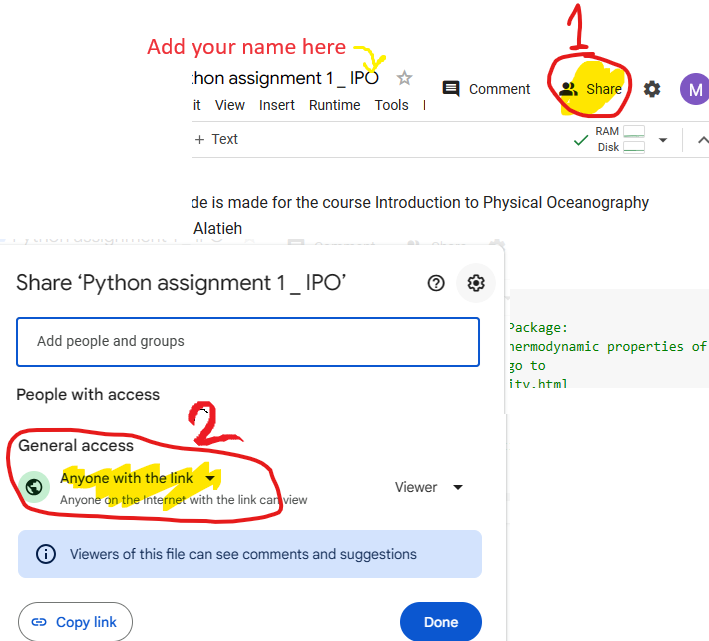